In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

We have 7043 rows and 21 columns in df dataset

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

These are the total columns present in the dataset,where we have target variable "Churn"

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here we have float and string type data,hence encoding needs to be applied

In [6]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In our target variable we have binary type data,where data imbalance is present

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We dont have any null values is present in our dataset

# APPLY ENCODING

In [8]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [9]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


In [10]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

We have converted the datas to float type by using  OrdinalEncoder

# STATISTICAL SUMMARY

In [13]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


Here is the statistical summary of df dataset

Key observation:
 
 1. The mean higher than the median(50th percentile) in columns 'tenure','TotalCharges',skewness might be present in these columns
 2. we dont observe extreme difference between the 75th percentile and max in any column

# DATA VISUALIZATION 

To check the missing values

<AxesSubplot:>

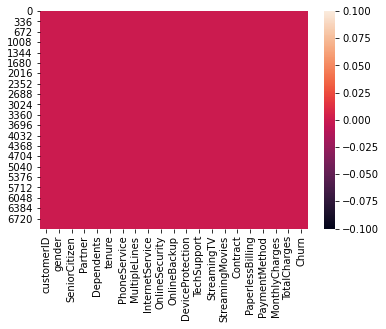

In [14]:
sns.heatmap(df.isnull())

No missing values are present in df dataset

# To check the correlation

In [15]:
cor=df.corr()
cor

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


<AxesSubplot:>

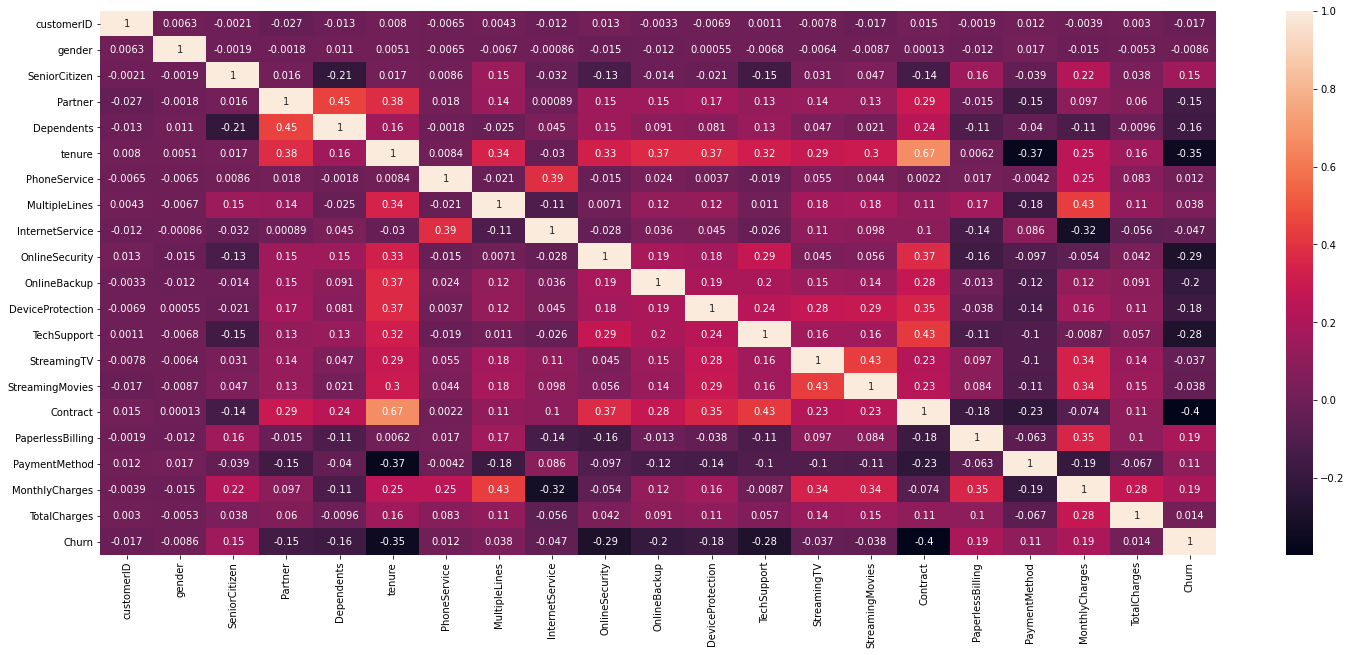

In [16]:
plt.figure(figsize=(25,10))
sns.heatmap(cor,annot=True)

Observation:
    
Light shades are positively correlated and dark shades are negatively correated 
    
"Churn" is highly negatively correlated with column 'tenure','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','Contract'

# PLOTTING OUTLIERS

customerID             AxesSubplot(0.125,0.657941;0.0945122x0.222059)
gender              AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
SeniorCitizen       AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Partner             AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
Dependents          AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
tenure              AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
PhoneService        AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
MultipleLines          AxesSubplot(0.125,0.391471;0.0945122x0.222059)
InternetService     AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
OnlineSecurity      AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
OnlineBackup        AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
DeviceProtection    AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
TechSupport         AxesSubplot(0.692073,0.391471;0.0945122x0.222059)
StreamingTV         AxesSubplot(0.805488,0.391471;0.0945122x0.222059)
StreamingMovies     

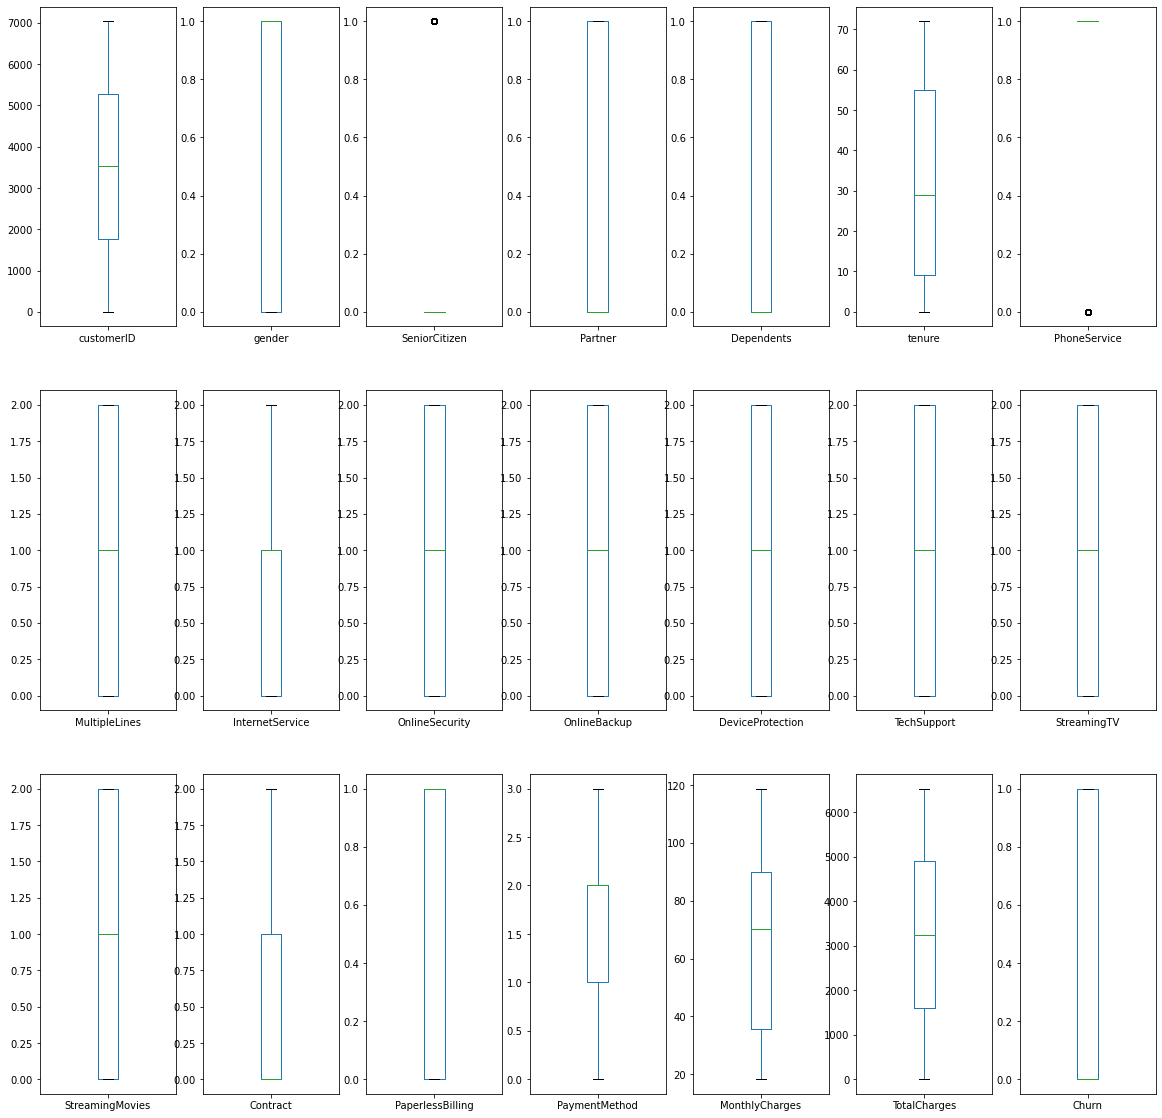

In [18]:
df.plot(kind="box",subplots=True,layout=(3,7),figsize=(20,20))    

Outliers are present in column 'SeniorCitizen','InternetService'

# TO CHECK THE COUNT OF DATA IN TARGET COLUMN

<AxesSubplot:xlabel='Churn', ylabel='count'>

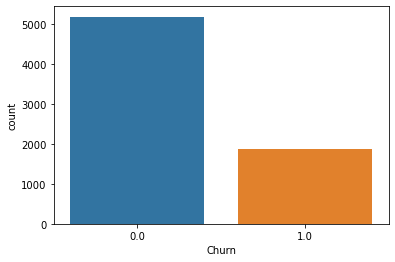

In [19]:
sns.countplot(df["Churn"])

Datas are not equally distributed,class imbalanced present

# TO CHECK THE DISTRIBUTION OF DATA IN COLUMNS

<AxesSubplot:xlabel='customerID', ylabel='Density'>

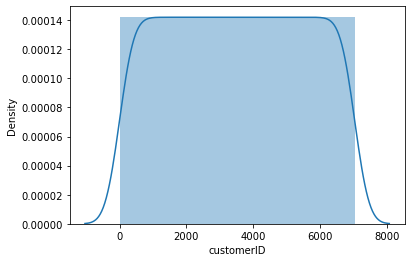

In [20]:
sns.distplot(df["customerID"])

in customerID datas are equally distributed 

<AxesSubplot:xlabel='gender', ylabel='Density'>

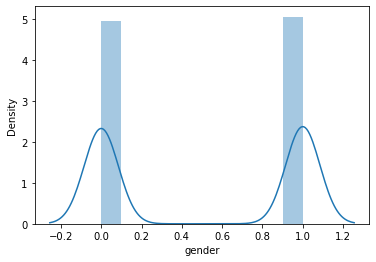

In [21]:
sns.distplot(df["gender"])

in gender column datas are not equally distributed

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

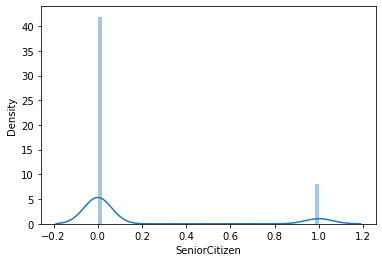

In [22]:
sns.distplot(df["SeniorCitizen"])

in SeniorCitizen column datas are not equally distributed

<AxesSubplot:xlabel='Partner', ylabel='Density'>

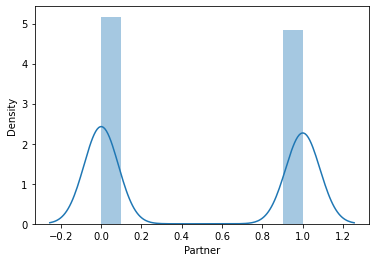

In [23]:
sns.distplot(df["Partner"])

in Partner column datas are not equally distributed

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

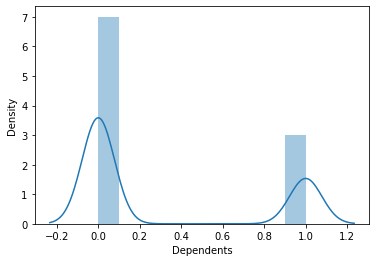

In [24]:
sns.distplot(df["Dependents"])

in Dependents column datas are not equally distributed

<AxesSubplot:xlabel='tenure', ylabel='Density'>

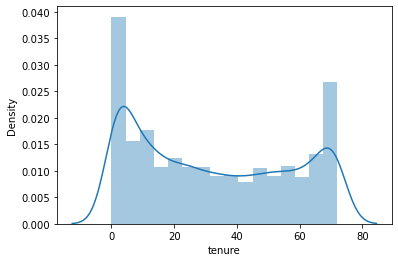

In [25]:
sns.distplot(df["tenure"])

in tenure column datas are not equally distributed

<AxesSubplot:xlabel='PhoneService', ylabel='Density'>

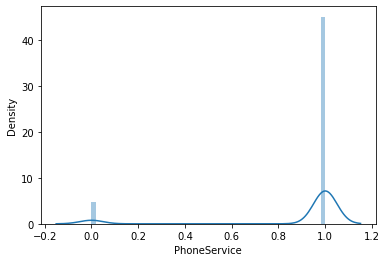

In [27]:
sns.distplot(df["PhoneService"])

in PhoneService column datas are not equally distributed

<AxesSubplot:xlabel='MultipleLines', ylabel='Density'>

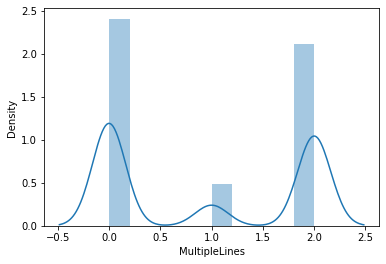

In [28]:
sns.distplot(df["MultipleLines"])

in MultipleLines column datas are not equally distributed

<AxesSubplot:xlabel='InternetService', ylabel='Density'>

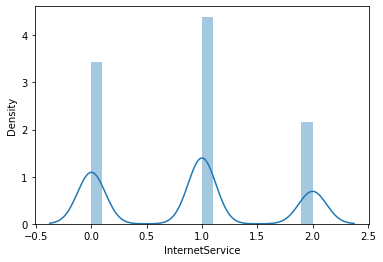

In [29]:
sns.distplot(df["InternetService"])

in InternetService column datas are not equally distributed

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Density'>

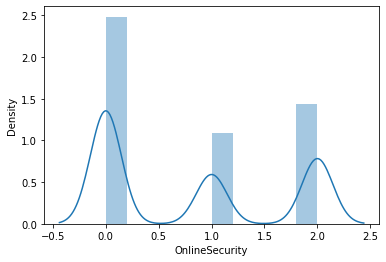

In [30]:
sns.distplot(df["OnlineSecurity"])

in OnlineSecurity column datas are not equally distributed

<AxesSubplot:xlabel='OnlineBackup', ylabel='Density'>

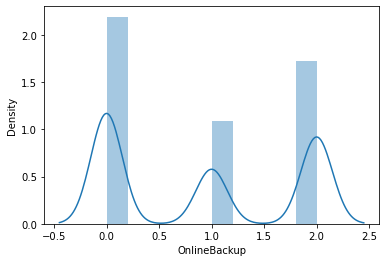

In [31]:
sns.distplot(df["OnlineBackup"])

in OnlineBackup column datas are not equally distributed

<AxesSubplot:xlabel='DeviceProtection', ylabel='Density'>

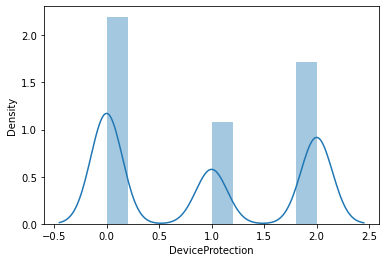

In [32]:
sns.distplot(df["DeviceProtection"])

in DeviceProtection column datas are not equally distributed

<AxesSubplot:xlabel='TechSupport', ylabel='Density'>

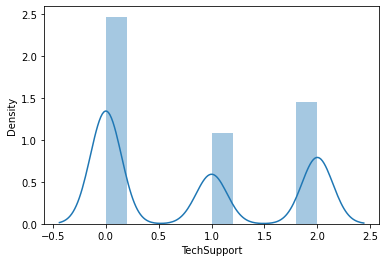

In [33]:
sns.distplot(df["TechSupport"])

in TechSupport column datas are not equally distributed

<AxesSubplot:xlabel='StreamingTV', ylabel='Density'>

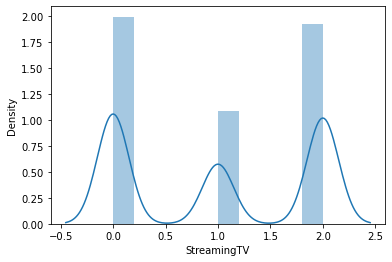

In [34]:
sns.distplot(df["StreamingTV"])

in StreamingTV column datas are not equally distributed

<AxesSubplot:xlabel='StreamingMovies', ylabel='Density'>

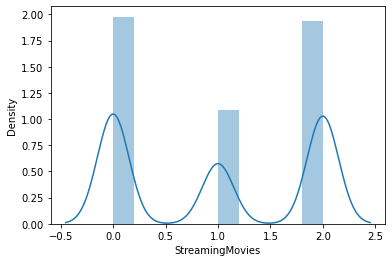

In [35]:
sns.distplot(df["StreamingMovies"])

in StreamingMovies column datas are not equally distributed

<AxesSubplot:xlabel='Contract', ylabel='Density'>

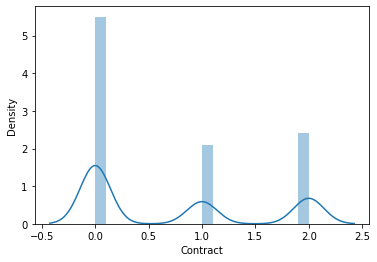

In [36]:
sns.distplot(df["Contract"])

in Contract column datas are not equally distributed

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Density'>

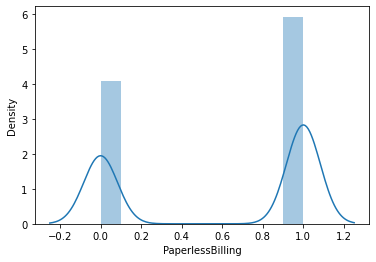

In [37]:
sns.distplot(df["PaperlessBilling"])

in PaperlessBilling column datas are not equally distributed

<AxesSubplot:xlabel='PaymentMethod', ylabel='Density'>

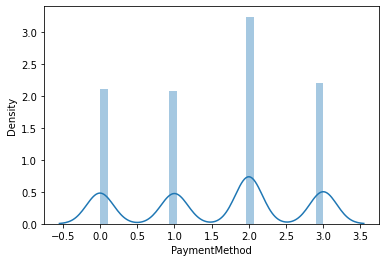

In [38]:
sns.distplot(df["PaymentMethod"])

in PaymentMethod column datas are not equally distributed

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

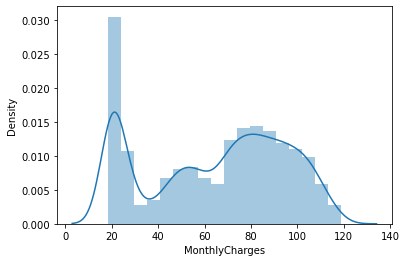

In [39]:
sns.distplot(df["MonthlyCharges"])

in MonthlyCharges column datas are not equally distributed

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

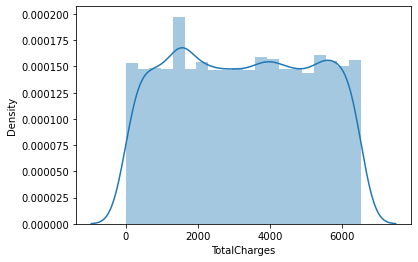

In [40]:
sns.distplot(df["TotalCharges"])

in TotalCharges column datas are equally distributed

<AxesSubplot:xlabel='Churn', ylabel='Density'>

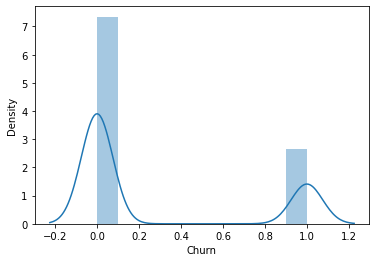

In [41]:
sns.distplot(df["Churn"])

Skewness is present in Churn column

# TO CHECK THE FREQUENCY OF THE DATA IN THE COLUMNS

<AxesSubplot:xlabel='customerID', ylabel='Count'>

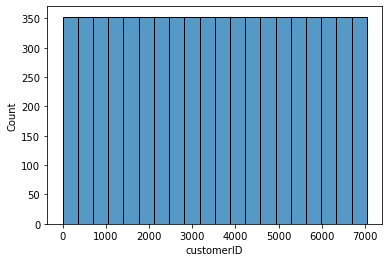

In [43]:
sns.histplot(df["customerID"],bins=20)

Data spread in column "customerID" is from 0 to 7000

<AxesSubplot:xlabel='gender', ylabel='Count'>

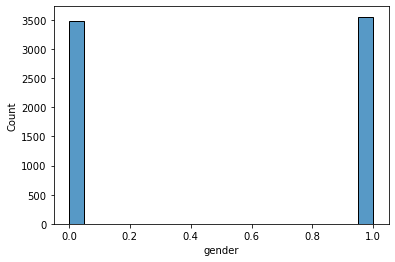

In [44]:
sns.histplot(df["gender"],bins=20)

Data spread in column "gender" is from 0.0 and 1.0

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Count'>

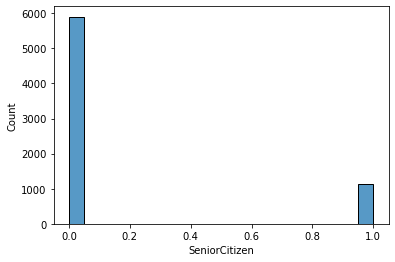

In [45]:
sns.histplot(df["SeniorCitizen"],bins=20)

Data spread in column "SeniorCitizen" is between 0.0 and 1.0

<AxesSubplot:xlabel='Partner', ylabel='Count'>

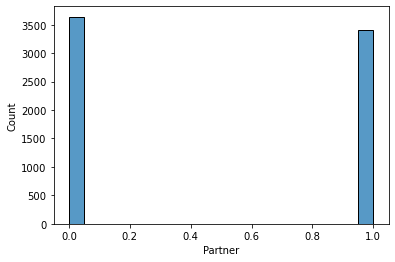

In [46]:
sns.histplot(df["Partner"],bins=20)

Data spread in column "Partner" is between 0.0 and 1.0

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

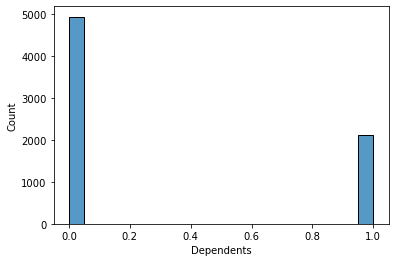

In [47]:
sns.histplot(df["Dependents"],bins=20)

Data spread in column "Dependents" is between 0.0 and 1.0

<AxesSubplot:xlabel='tenure', ylabel='Count'>

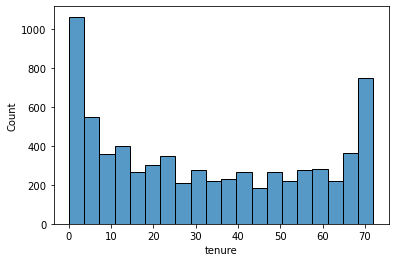

In [48]:
sns.histplot(df["tenure"],bins=20)

Data spread in column "tenure" is between 0 to 70

<AxesSubplot:xlabel='PhoneService', ylabel='Count'>

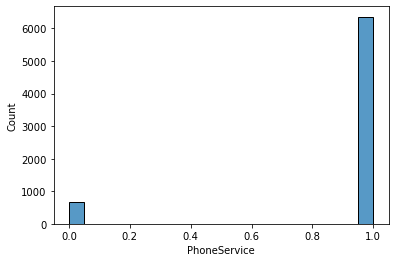

In [50]:
sns.histplot(df["PhoneService"],bins=20)

Data spread in column "PhoneService" is between 0 and 1.0

<AxesSubplot:xlabel='DeviceProtection', ylabel='Count'>

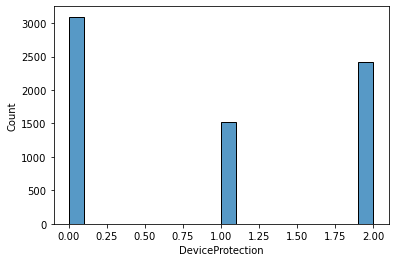

In [51]:
sns.histplot(df["DeviceProtection"],bins=20)

Data spread in column "DeviceProtection" is between 0.00,1.00 and 2.00

<AxesSubplot:xlabel='TechSupport', ylabel='Count'>

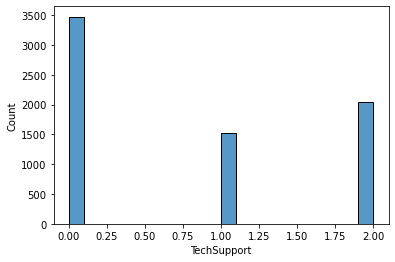

In [52]:
sns.histplot(df["TechSupport"],bins=20)

Data spread in column "TechSupport" is between 0.00,1.00 and 2.00

<AxesSubplot:xlabel='StreamingTV', ylabel='Count'>

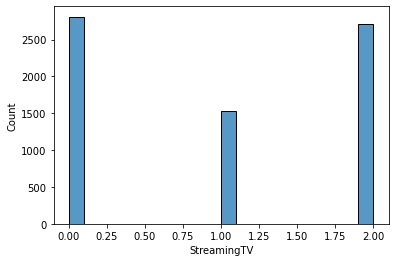

In [53]:
sns.histplot(df["StreamingTV"],bins=20)

Data spread in column "StreamingTV" is between 0.00,1.00 and 2.00

<AxesSubplot:xlabel='Contract', ylabel='Count'>

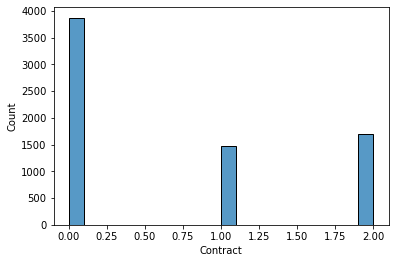

In [54]:
sns.histplot(df["Contract"],bins=20)

Data spread in column "Contract" is between 0.00,1.00 and 2.00

<AxesSubplot:xlabel='Churn', ylabel='Count'>

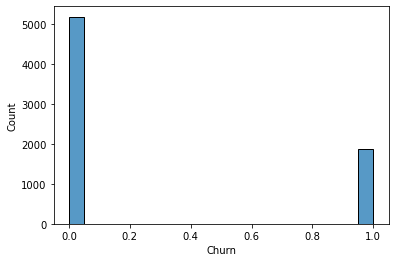

In [55]:
sns.histplot(df["Churn"],bins=20)

Data spread in column "Churn" is between 0.0 and 1.0

# TO CHECK THE RELATION OF EACH COLUMN TARGET VARIABLE

<AxesSubplot:xlabel='customerID', ylabel='Churn'>

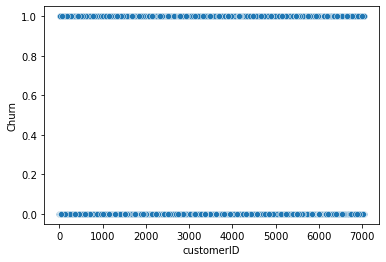

In [57]:
sns.scatterplot(x="customerID",y="Churn",data=df)

High data spread is between 0 to 7000

<AxesSubplot:xlabel='gender', ylabel='Churn'>

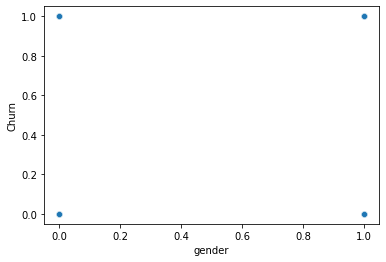

In [58]:
sns.scatterplot(x="gender",y="Churn",data=df)

High data spread is between 0.0 and 1.0

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

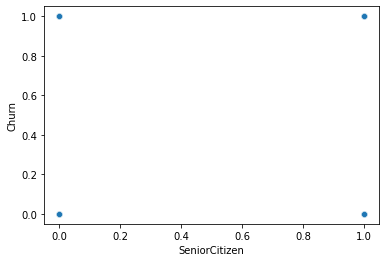

In [59]:
sns.scatterplot(x="SeniorCitizen",y="Churn",data=df)

High data spread is between 0.0 and 1.0

<AxesSubplot:xlabel='Dependents', ylabel='Churn'>

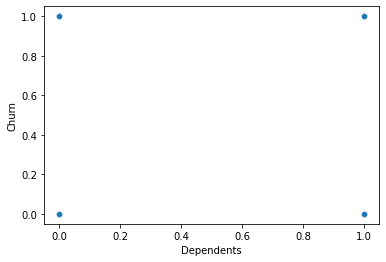

In [60]:
sns.scatterplot(x="Dependents",y="Churn",data=df)

High data spread is between 0.0 and 1.0

<AxesSubplot:xlabel='MultipleLines', ylabel='Churn'>

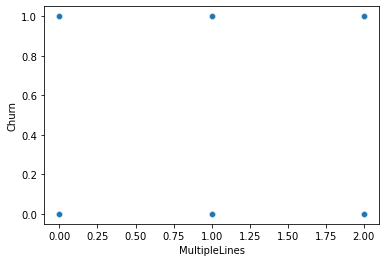

In [61]:
sns.scatterplot(x="MultipleLines",y="Churn",data=df)

High data spread is between 0.00,1.00 and 2.00

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Churn'>

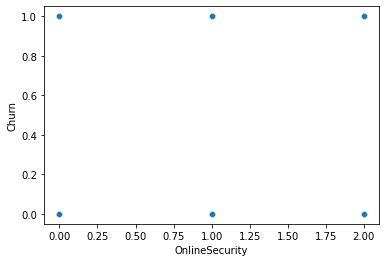

In [62]:
sns.scatterplot(x="OnlineSecurity",y="Churn",data=df)

High data spread is between 0.00,1.00 and 2.00

<AxesSubplot:xlabel='DeviceProtection', ylabel='Churn'>

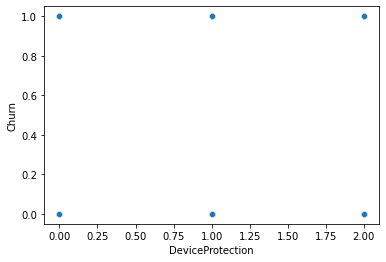

In [63]:
sns.scatterplot(x="DeviceProtection",y="Churn",data=df)

High data spread is between 0.00,1.00 and 2.00

<AxesSubplot:xlabel='TechSupport', ylabel='Churn'>

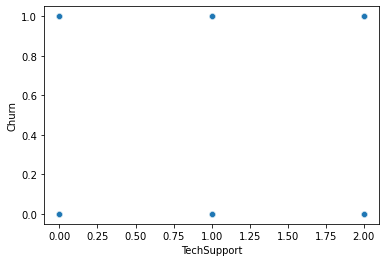

In [64]:
sns.scatterplot(x="TechSupport",y="Churn",data=df)

High data spread is between 0.00,1.00 and 2.00

<AxesSubplot:xlabel='StreamingTV', ylabel='Churn'>

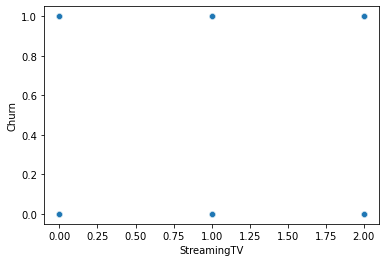

In [65]:
sns.scatterplot(x="StreamingTV",y="Churn",data=df)

High data spread is between 0.00,1.00 and 2.00

<AxesSubplot:xlabel='Contract', ylabel='Churn'>

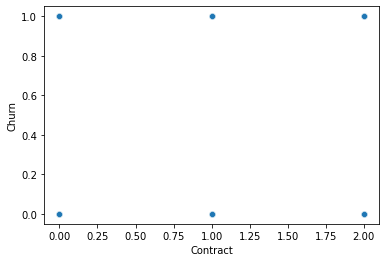

In [66]:
sns.scatterplot(x="Contract",y="Churn",data=df)

High data spread is between 0.00,1.00 and 2.00

<AxesSubplot:xlabel='PaymentMethod', ylabel='Churn'>

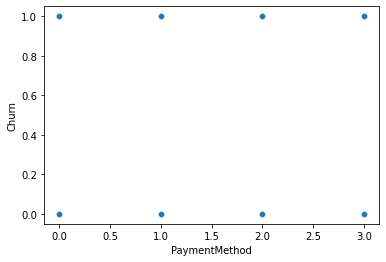

In [67]:
sns.scatterplot(x="PaymentMethod",y="Churn",data=df)

High data spread is between 0.0,1.0,2.0 and 3.0

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

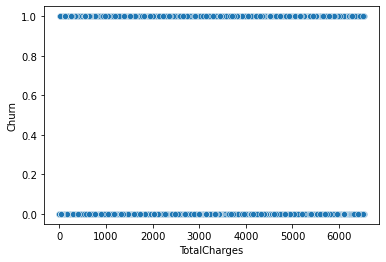

In [68]:
sns.scatterplot(x="TotalCharges",y="Churn",data=df)

High data spread is between 0 to 7000

# REMOVING OUTLIERS

In [70]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.91189045, 1.00955867, 0.43991649, ..., 1.16032292, 0.39860759,
        0.60102348],
       [0.21690598, 0.99053183, 0.43991649, ..., 0.25962894, 0.94876238,
        0.60102348],
       [0.47070074, 0.99053183, 0.43991649, ..., 0.36266036, 1.64188328,
        1.66382851],
       ...,
       [0.07574495, 1.00955867, 0.43991649, ..., 1.1686319 , 0.13968008,
        0.60102348],
       [1.18683477, 0.99053183, 2.27315869, ..., 0.32033821, 0.31653445,
        1.66382851],
       [0.63694614, 0.99053183, 0.43991649, ..., 1.35896134, 1.13801338,
        0.60102348]])

In [71]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [72]:
df_new=df[(z<3).all(axis=1)]
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,6104.0,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1550.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,770.0,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


In [73]:
df.shape

(7043, 21)

In [74]:
df_new.shape

(6361, 21)

In [75]:
682/7043

0.09683373562402385

We have lost 0.9% data by removing outliers

In [76]:
df=df_new
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,6104.0,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1550.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,770.0,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


# DIVIDING THE COLUMNS AS x AND y

In [77]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

# APPLYING variance_inflation_factor

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
x.shape[1]

20

In [80]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [81]:
vif_calc()

    VIF FACTOR          features
0     1.002805        customerID
1     1.002018            gender
2     1.152597     SeniorCitizen
3     1.471024           Partner
4     1.386446        Dependents
5     2.833354            tenure
6    27.750720      PhoneService
7     1.416757     MultipleLines
8     1.582542   InternetService
9     1.248417    OnlineSecurity
10    1.198578      OnlineBackup
11    1.274589  DeviceProtection
12    1.307495       TechSupport
13    1.443642       StreamingTV
14    1.445450   StreamingMovies
15    2.515719          Contract
16    1.216180  PaperlessBilling
17    1.178703     PaymentMethod
18    2.785742    MonthlyCharges
19    1.121626      TotalCharges


Multicollinearity is visible between the columns,here we will drop "OnlineSecurity","Contract","TechSupport","tenure" column as these are having less values

In [82]:
df.drop(["OnlineSecurity","Contract","TechSupport","tenure"],axis=1,inplace=True)

In [83]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup',
       'DeviceProtection', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

Dropped columns are no longer present in dataset

# REMOVING THE SKEWNESS 

In [84]:
df.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineBackup        0.167910
DeviceProtection    0.183254
StreamingTV        -0.002734
StreamingMovies    -0.010025
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

In [85]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [86]:
x

array([[ 0.30313384,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.373024  , -0.91318558],
       [-0.35817008,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.47442923, -1.92907201],
       [ 1.35238168, -1.00741628, -0.44159123, ...,  0.41100623,
         0.08479714, -1.27117282],
       ...,
       [-0.92323829, -1.00741628, -0.44159123, ..., -0.52011602,
         1.20975572,  1.18471797],
       [ 1.12752839,  0.99263832,  2.26453771, ...,  1.31916733,
         0.21003559, -0.23449454],
       [-0.53290672,  0.99263832, -0.44159123, ..., -1.48777569,
         1.29661682,  1.06030131]])

Applied power_transform method to remove the skewness 

# APPLYING SMOTE TECHNIQUE FOR IMBALANCED DATA

In [87]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [88]:
train_x,train_y=smt.fit_resample(x,y)

In [89]:
train_y.value_counts()

1.0    4662
0.0    4662
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

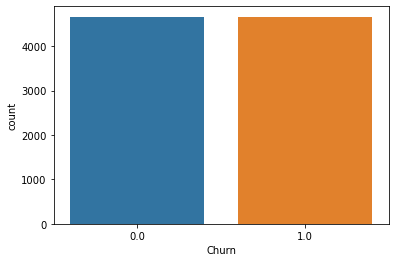

In [90]:
sns.countplot(train_y)

By using smote technique we make the target data balanced 

# APPLYING SCALING

In [91]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.30313384,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.373024  , -0.91318558],
       [-0.35817008,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.47442923, -1.92907201],
       [ 1.35238168, -1.00741628, -0.44159123, ...,  0.41100623,
         0.08479714, -1.27117282],
       ...,
       [-0.92323829, -1.00741628, -0.44159123, ..., -0.52011602,
         1.20975572,  1.18471797],
       [ 1.12752839,  0.99263832,  2.26453771, ...,  1.31916733,
         0.21003559, -0.23449454],
       [-0.53290672,  0.99263832, -0.44159123, ..., -1.48777569,
         1.29661682,  1.06030131]])

In [92]:
x

array([[ 0.30313384,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.373024  , -0.91318558],
       [-0.35817008,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.47442923, -1.92907201],
       [ 1.35238168, -1.00741628, -0.44159123, ...,  0.41100623,
         0.08479714, -1.27117282],
       ...,
       [-0.92323829, -1.00741628, -0.44159123, ..., -0.52011602,
         1.20975572,  1.18471797],
       [ 1.12752839,  0.99263832,  2.26453771, ...,  1.31916733,
         0.21003559, -0.23449454],
       [-0.53290672,  0.99263832, -0.44159123, ..., -1.48777569,
         1.29661682,  1.06030131]])

applying scaling technique to make all the data even 

# APPLYING VARIOUS MODEL TO GET THE BEST ACCURACY SCORE

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
from sklearn.metrics import accuracy_score 

In [94]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=40)

# LogisticRegression

In [95]:
lr.fit(train_x,train_y)
pred_train=lr.predict(train_x)
pred_test=lr.predict(test_x)
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       944
         1.0       0.65      0.55      0.60       329

    accuracy                           0.81      1273
   macro avg       0.75      0.72      0.74      1273
weighted avg       0.80      0.81      0.80      1273



By applying LogisticRegression we are getting the accuracy of 0.81

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

# DecisionTreeClassifier

In [97]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred=dtc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       944
         1.0       0.48      0.50      0.49       329

    accuracy                           0.73      1273
   macro avg       0.65      0.66      0.65      1273
weighted avg       0.73      0.73      0.73      1273



By applying DecisionTreeClassifier we are getting the accuracy of 0.73

# RandomForestClassifier

In [98]:
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
pred=rfc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       944
         1.0       0.63      0.50      0.56       329

    accuracy                           0.79      1273
   macro avg       0.73      0.70      0.71      1273
weighted avg       0.78      0.79      0.79      1273



We are getting the accuracy of 0.79 by using RandomForestClassifier

# SupportVectorClassifier 

In [99]:
svc=SVC()
svc.fit(train_x,train_y)
pred=svc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       944
         1.0       0.65      0.48      0.55       329

    accuracy                           0.80      1273
   macro avg       0.74      0.70      0.71      1273
weighted avg       0.79      0.80      0.79      1273



We are getting the accuracy of 0.80 by using SupportVectorClassifier

# CHECKING THE CROSS VALIDATION SCORE WITH ACCURACY SCORE

### Checking the cross validation score of LogisticRegression 

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
cv=cross_val_score(lr,x,y,cv=4).mean()
print(cv)

0.8080481205206962


In [102]:
cv=cross_val_score(rfc,x,y,cv=4).mean()
print(cv)

0.7946865030893113


In [103]:
cv=cross_val_score(dtc,x,y,cv=4).mean()
print(cv)

0.7355775806521748


In [104]:
cv=cross_val_score(svc,x,y,cv=4).mean()
print(cv)

0.7986167277413438


LogisticRegression is providing the best accuracy_score as its has less difference between the accuracy score and cv score

# AUC ROC CURVE

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [106]:
y_pred_prob=lr.predict_proba(test_x)[:,1]
y_pred_prob

array([0.03170039, 0.50745591, 0.38839039, ..., 0.01634486, 0.04479262,
       0.24398426])

In [107]:
fpr,tpr,threshold=roc_curve(test_y,y_pred_prob)

In [108]:
fpr

array([0.        , 0.        , 0.        , 0.00105932, 0.00105932,
       0.00211864, 0.00211864, 0.00317797, 0.00317797, 0.00529661,
       0.00529661, 0.00635593, 0.00635593, 0.00741525, 0.00741525,
       0.00847458, 0.00847458, 0.0095339 , 0.0095339 , 0.01059322,
       0.01059322, 0.01165254, 0.01165254, 0.01271186, 0.01271186,
       0.01483051, 0.01483051, 0.01588983, 0.01588983, 0.01694915,
       0.01694915, 0.01800847, 0.01800847, 0.0190678 , 0.0190678 ,
       0.02012712, 0.02012712, 0.02118644, 0.02118644, 0.02224576,
       0.02224576, 0.02330508, 0.02330508, 0.02542373, 0.02542373,
       0.02754237, 0.02754237, 0.03072034, 0.03072034, 0.03177966,
       0.03177966, 0.03283898, 0.03283898, 0.03495763, 0.03495763,
       0.03707627, 0.03707627, 0.03813559, 0.03813559, 0.04025424,
       0.04025424, 0.04131356, 0.04131356, 0.04237288, 0.04237288,
       0.0434322 , 0.0434322 , 0.04449153, 0.04449153, 0.04555085,
       0.04555085, 0.04766949, 0.04766949, 0.04872881, 0.04872

In [109]:
tpr

array([0.        , 0.00303951, 0.02735562, 0.02735562, 0.05167173,
       0.05167173, 0.06990881, 0.06990881, 0.09118541, 0.09118541,
       0.09422492, 0.09422492, 0.10638298, 0.10638298, 0.10942249,
       0.10942249, 0.11854103, 0.11854103, 0.12765957, 0.12765957,
       0.1337386 , 0.1337386 , 0.16109422, 0.16109422, 0.18541033,
       0.18541033, 0.20364742, 0.20364742, 0.20972644, 0.20972644,
       0.21884498, 0.21884498, 0.22796353, 0.22796353, 0.23404255,
       0.23404255, 0.25227964, 0.25227964, 0.26139818, 0.26139818,
       0.27355623, 0.27355623, 0.28267477, 0.28267477, 0.29179331,
       0.29179331, 0.29787234, 0.29787234, 0.30395137, 0.30395137,
       0.31306991, 0.31306991, 0.31914894, 0.31914894, 0.32522796,
       0.32522796, 0.32826748, 0.32826748, 0.34042553, 0.34042553,
       0.36170213, 0.36170213, 0.37082067, 0.37082067, 0.37386018,
       0.37386018, 0.38297872, 0.38297872, 0.38905775, 0.38905775,
       0.39209726, 0.39209726, 0.39513678, 0.39513678, 0.39817

In [110]:
threshold

array([1.89669524, 0.89669524, 0.84768914, 0.84499143, 0.82274617,
       0.8217252 , 0.81207125, 0.8120055 , 0.80285616, 0.79962472,
       0.79949205, 0.79717907, 0.78581277, 0.78532497, 0.78461394,
       0.78413123, 0.77926422, 0.77726232, 0.77395066, 0.77362606,
       0.7729249 , 0.77264619, 0.76407561, 0.76364528, 0.75757709,
       0.75602406, 0.74459848, 0.74392409, 0.74195508, 0.74168923,
       0.74009187, 0.73844166, 0.73637859, 0.73618781, 0.73358561,
       0.73325186, 0.7223909 , 0.7223231 , 0.7160714 , 0.71183094,
       0.70926567, 0.70828101, 0.7071971 , 0.70146784, 0.68806421,
       0.68640696, 0.68396815, 0.68205679, 0.6812365 , 0.68123519,
       0.67647848, 0.6763699 , 0.67338091, 0.670688  , 0.66898086,
       0.66800945, 0.66433497, 0.66331559, 0.66024097, 0.65544705,
       0.64917734, 0.64785992, 0.64045831, 0.6382526 , 0.63615109,
       0.63592039, 0.62996311, 0.62912609, 0.62461455, 0.62393366,
       0.62260302, 0.61986603, 0.61649161, 0.61500507, 0.61395

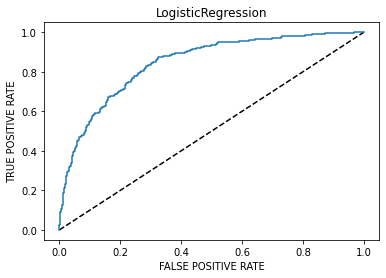

In [111]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="LogisticRegression")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("LogisticRegression")
plt.show()

Plotted the auc roc curve of the best model LogisticRegression 

# SAVING THE BEST MODEL

In [113]:
import joblib
joblib.dump(lr,"best_lr_customerfile.obj")

['best_lr_customerfile.obj']